<a href="https://colab.research.google.com/github/hamjins/algorithm/blob/master/sin_nn_drawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 비선형 학습모델 실습(SIN 그래프)

1. sin 함수를 기반으로 노이즈를 추가하여 랜덤한 데이터셋 생성 (비선형 데이터)

2. 이를 데이터셋으로 뉴럴네트워크 학습

3. 얼만큼 잘 맞추는지 그래프로 확인

<뉴럴네트워크 구성>

![뉴럴네트워크구성](https://github.com/jaeyong1/deeplearningforus/blob/master/images/sinnn.jpg?raw=true)


No handles with labels found to put in legend.


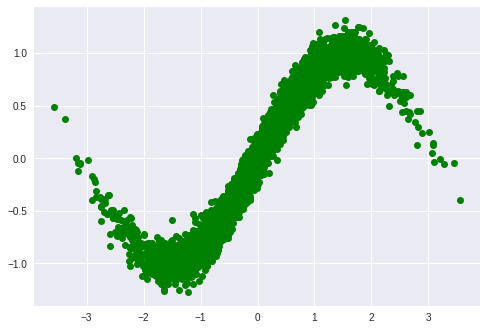

Step=    0, Loss Value=0.247934
Step=   10, Loss Value=0.018536
Step=   20, Loss Value=0.012462
Step=   30, Loss Value=0.013865
Step=   40, Loss Value=0.021093
Step=   50, Loss Value=0.010085
Step=   60, Loss Value=0.012774
Step=   70, Loss Value=0.010819
Step=   80, Loss Value=0.013305
Step=   90, Loss Value=0.011601
Step=  100, Loss Value=0.012898
Step=  200, Loss Value=0.010920
Step=  300, Loss Value=0.011411
Step=  400, Loss Value=0.014685
Step=  500, Loss Value=0.011668
Step=  600, Loss Value=0.024838
Step=  700, Loss Value=0.013428
Step=  800, Loss Value=0.014512
Step=  900, Loss Value=0.014694
Step= 1000, Loss Value=0.019419
Step= 1100, Loss Value=0.014424
Step= 1200, Loss Value=0.011424
Step= 1300, Loss Value=0.021238
Step= 1400, Loss Value=0.031186
Step= 1500, Loss Value=0.026046
Step= 1600, Loss Value=0.026556
Step= 1700, Loss Value=0.023361
Step= 1800, Loss Value=0.013540
Step= 1900, Loss Value=0.018610
Step= 2000, Loss Value=0.014237
Step= 2100, Loss Value=0.030487
Step= 22

No handles with labels found to put in legend.


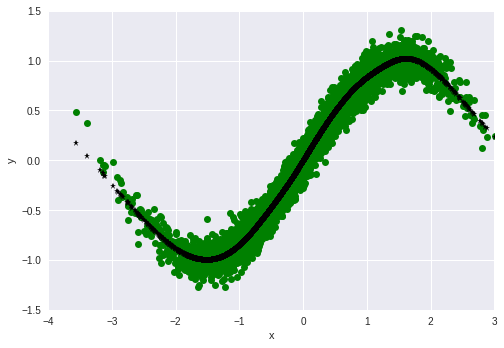

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 20 23:25:01 2018

@author: jynote
"""

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#데이터셋을 섞음(train/validation/test data set)
def shuffle_data(x_train,y_train):
  temp_index = np.arange(len(x_train))

  #Random suffle index
  np.random.shuffle(temp_index)

  #Re-arrange x and y data with random shuffle index
  x_temp = np.zeros(x_train.shape)
  y_temp = np.zeros(y_train.shape)
  x_temp = x_train[temp_index]
  y_temp = y_train[temp_index]        

  return x_temp, y_temp


def main():
  num_points = 5000 #(X,Y)데이터 개수
  vectors_set = []
  for i in range(num_points):
      x1=np.random.normal(.0, 1.0)
      y1=np.sin(x1) + np.random.normal(0.,0.1)
      vectors_set.append([x1,y1])

  x_data = [v[0] for v in vectors_set]
  y_data = [v[1] for v in vectors_set]


  #green색(g)에 둥근점(o)로 시각화
  plt.plot(x_data, y_data, 'go')
  plt.legend()
  plt.show()

  #배치 수행단위 
  BATCH_SIZE = 100
  BATCH_NUM = int(len(x_data)/BATCH_SIZE)

  #데이터를 세로로(한개씩)나열한 형태로 reshape
  x_data = np.reshape(x_data, [len(x_data),1])
  y_data = np.reshape(y_data, [len(y_data),1])

  #총 갯수는 정해지지않았고 1개씩 들어가는 Placeholder 생성
  input_data = tf.placeholder(tf.float32, shape=[None,1])
  output_data = tf.placeholder(tf.float32, shape=[None,1])

  #레이어간 Weight 정의후 랜덤값으로 초기화. 그림에서는 선으로 표시.
  W1 = tf.Variable(tf.random_uniform([1,5], -1.0, 1.0))
  W2 = tf.Variable(tf.random_uniform([5,3], -1.0, 1.0))
  W_out = tf.Variable(tf.random_uniform([3,1], -1.0, 1.0))

  #레이어의 노드가 하는 계산. 이전노드와 현재노드의 곱셈. 비선형함수로 sigmoid 추가.
  hidden1 = tf.nn.sigmoid(tf.matmul(input_data,W1))
  hidden2 = tf.nn.sigmoid(tf.matmul(hidden1,W2))
  output = tf.matmul(hidden2, W_out)

  #비용함수, 최적화함수, train 정의
  loss = tf.reduce_mean(tf.square(output-output_data))
  optimizer = tf.train.AdamOptimizer(0.01)
  train = optimizer.minimize(loss)

  #변수(Variable) 사용준비
  init = tf.global_variables_initializer()

  #세션열고 init 실행
  sess= tf.Session()
  sess.run(init)


  #5000회 학습을 반복하며 값 업데이트
  for step in range(5000):
    index = 0    
    
    #매번 데이터셋을 섞음
    x_data, y_data = shuffle_data(x_data, y_data)
    
    #배치크기만큼 학습을 진행
    for batch_iter in range(BATCH_NUM-1):
        feed_dict = {input_data: x_data[index:index+BATCH_SIZE], output_data: y_data[index:index+BATCH_SIZE]} #origin
        sess.run(train, feed_dict = feed_dict)
        index += BATCH_SIZE

    #화면에 학습진행상태 출력(최초100회까지는 10마다 한번씩, 이후는 100회에 한번씩)
    if (step%100==0 or (step<100 and step%10==0)): 
        print("Step=%5d, Loss Value=%f" %(step, sess.run(loss, feed_dict = feed_dict)))      


  #5000번 학습이 끝난후 그래프로 결과확인
  feed_dict = {input_data: x_data}
  plt.plot(x_data, y_data, 'go') #학습 데이터는 green색(g)의 둥근점(o)로 시각화
  plt.plot(x_data, sess.run(output, feed_dict=feed_dict), 'k*') #예측모델 출력은 검은색(k) 별표(*)로 시각화
  plt.xlabel('x')
  plt.xlim(-4,3)
  plt.ylabel('y')
  plt.ylim(-1.5,1.5)
  plt.legend()
  plt.show()
  
#main함수
if __name__ == "__main__":
  main()

